In [39]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [40]:
# random seed for reproducibility
np.random.seed(42)

# Generate random data for 100 patients
num_patients = 1000

In [41]:
# Generate patient IDs
patient_ids = np.arange(1, num_patients + 1)

In [42]:
# Generate random appointment times within a week
appointment_times = [datetime(2024, 1, 1) + timedelta(days=np.random.randint(1, 7), hours=np.random.randint(8, 17)) for _ in range(num_patients)]


In [43]:
# Generate random check-in times within a 45-minute window of the appointment time
checkin_times = [time + timedelta(minutes=np.random.randint(0, 45)) for time in appointment_times]


In [60]:

waiting_times = [((checkin - appointment).total_seconds() + np.random.randint(300, 600))/ 60 for appointment, checkin in zip(appointment_times, checkin_times)]
delay_minutes = np.random.randint(0, 46, num_patients)

In [61]:
# Create a DataFrame
data = pd.DataFrame({
    'Patient_ID': patient_ids,
    'Appointment_Time': appointment_times,
    'Checkin_Time': checkin_times,
    'Waiting_Time': waiting_times
})

In [62]:
data.head(10)

,Patient_ID,Appointment_Time,Checkin_Time,Waiting_Time
0,1,2024-01-05 15:00:00,2024-01-05 15:23:00,32.083333
1,2,2024-01-06 12:00:00,2024-01-06 12:18:00,24.933333
2,3,2024-01-03 10:00:00,2024-01-03 10:35:00,41.516667
3,4,2024-01-04 15:00:00,2024-01-04 15:38:00,43.450000
4,5,2024-01-06 11:00:00,2024-01-06 11:09:00,14.400000
5,6,2024-01-04 13:00:00,2024-01-04 13:24:00,29.950000
6,7,2024-01-06 09:00:00,2024-01-06 09:17:00,26.933333
7,8,2024-01-05 13:00:00,2024-01-05 13:18:00,25.216667
8,9,2024-01-03 12:00:00,2024-01-03 12:35:00,44.133333
9,10,2024-01-02 13:00:00,2024-01-02 13:09:00,14.616667


## Visualization

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


In [64]:
# Display basic statistics of the waiting times
print(data['Waiting_Time'].describe())

count    1000.000000
mean       29.247783
std        12.824264
min         5.516667
25%        18.454167
50%        28.541667
75%        40.687500
max        53.716667
Name: Waiting_Time, dtype: float64


#### GRAPHS

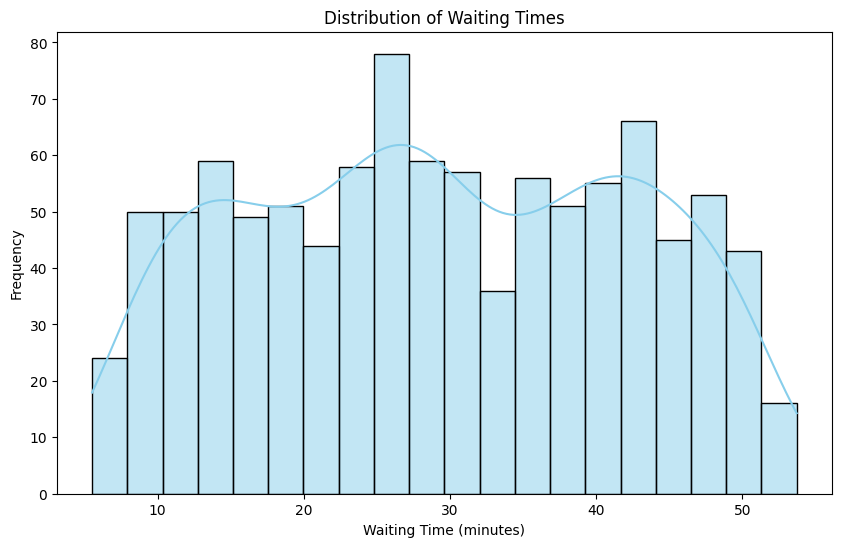

In [65]:
# Visualize the distribution of waiting times
plt.figure(figsize=(10, 6))
sns.histplot(data['Waiting_Time'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Waiting Times')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.show()

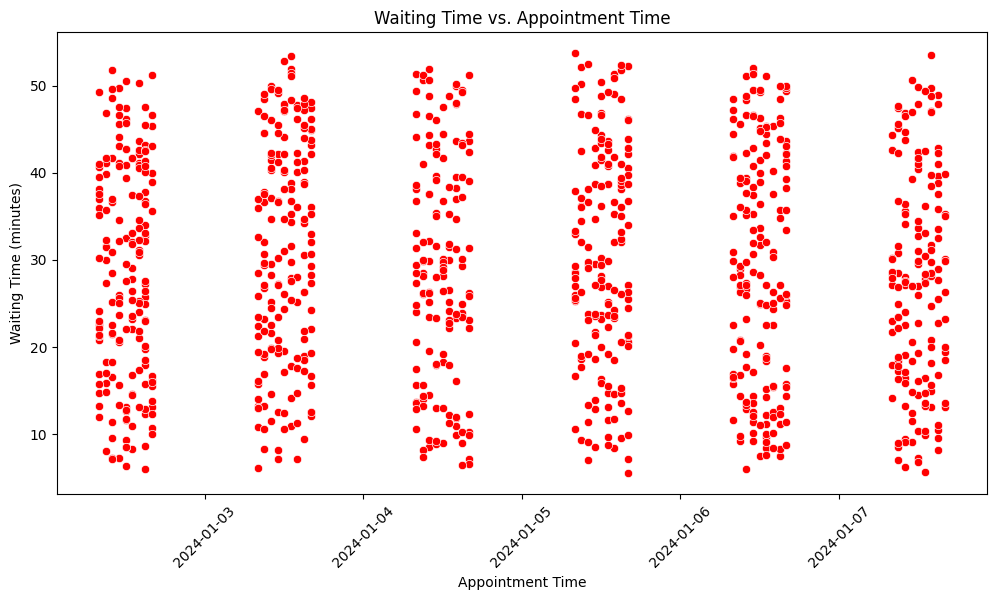

In [66]:
# Visualize the relationship between waiting time and appointment time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Appointment_Time', y='Waiting_Time', data=data, color='red')
plt.title('Waiting Time vs. Appointment Time')
plt.xlabel('Appointment Time')
plt.ylabel('Waiting Time (minutes)')
plt.xticks(rotation=45)
plt.show()

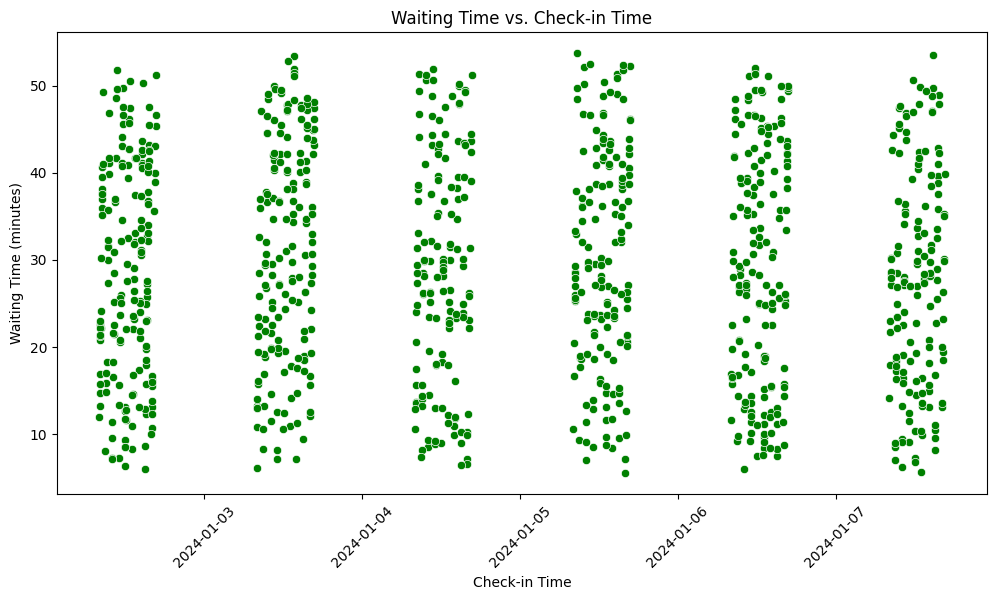

In [67]:
# Visualize the relationship between waiting time and check-in time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Checkin_Time', y='Waiting_Time', data=data, color='green')
plt.title('Waiting Time vs. Check-in Time')
plt.xlabel('Check-in Time')
plt.ylabel('Waiting Time (minutes)')
plt.xticks(rotation=45)
plt.show()

### MODEL SELECTION

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [69]:
# Convert appointment and check-in times to seconds
base_timestamp = datetime(1970, 1, 1)  # Unix epoch
data['Appointment_Time_Encoded'] = (data['Appointment_Time'] - base_timestamp).dt.total_seconds()
data['Checkin_Time_Encoded'] = (data['Checkin_Time'] - base_timestamp).dt.total_seconds()


In [70]:

# Select features and target variable
features = ['Appointment_Time_Encoded', 'Checkin_Time_Encoded']
target = 'Waiting_Time'

In [71]:
X = data[features]
y = data[target]

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [74]:
# Model 2: Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [75]:

# Initialize SVM model
svm_model_fs = SVR()


In [76]:
svm_model_fs.fit(X_train, y_train)

SVR()

### MODEL EVALUATION

In [77]:
# Model evaluation on the testing set
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

linear_mse, linear_r2 = evaluate_model(linear_model, X_test, y_test)
rf_mse, rf_r2 = evaluate_model(rf_model, X_test, y_test)
svm_fs_mse, svm_fs_r2 = evaluate_model(svm_model_fs, X_test, y_test)


In [78]:
# Display model evaluation results
print("Linear Regression - Mean Squared Error:", linear_mse)
print("Linear Regression - R-squared:", linear_r2)
print("\nRandom Forest Regression - Mean Squared Error:", rf_mse)
print("Random Forest Regression - R-squared:", rf_r2)
print("\nSVM with Feature Selection - Mean Squared Error:", svm_fs_mse)
print("SVM with Feature Selection - R-squared:", svm_fs_r2)

Linear Regression - Mean Squared Error: 1.9901137771385802
Linear Regression - R-squared: 0.9884914130110608

Random Forest Regression - Mean Squared Error: 17.36031309791877
Random Forest Regression - R-squared: 0.8996074115270516

SVM with Feature Selection - Mean Squared Error: 177.78191122728353
SVM with Feature Selection - R-squared: -0.028091264892833312


#### WE ARE FINE TUNNING LINEAR REGRESSION

Best Hyperparameters: {'alpha': 10}

Tuned Ridge Regression - Mean Squared Error: 1.9901137842484433
Tuned Ridge Regression - R-squared: 0.9884914129699454


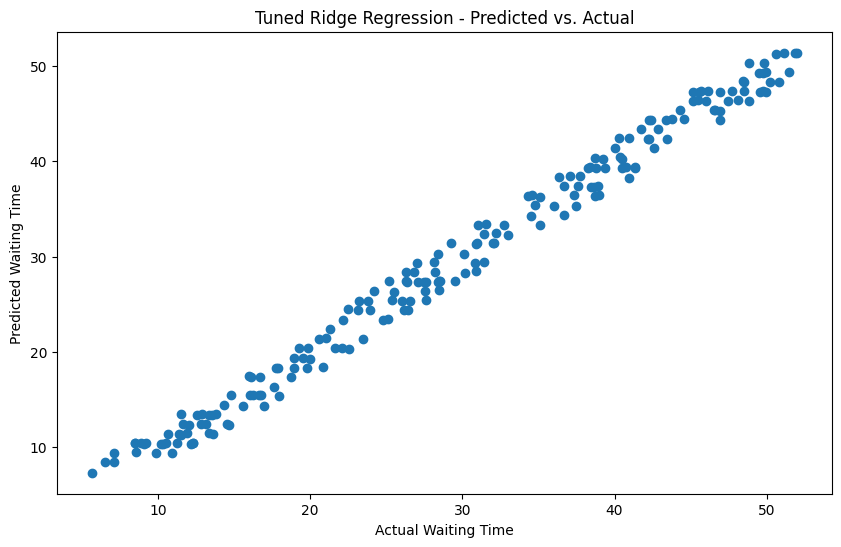

In [79]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Select features and target variable
features = ['Appointment_Time_Encoded', 'Checkin_Time_Encoded']
target = 'Waiting_Time'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for fine-tuning (alpha for L1 regularization, beta for L2 regularization)
param_grid = {
    'alpha': [0.1, 1, 10],
  
}

# Initialize Ridge Regression model
ridge_model = Ridge()

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_

# Train the Ridge Regression model with the best hyperparameters on the entire training set
ridge_model_tuned = Ridge(**best_params)
ridge_model_tuned.fit(X_train, y_train)

# Evaluate the tuned Ridge Regression model on the testing set
tuned_ridge_mse, tuned_ridge_r2 = evaluate_model(ridge_model_tuned, X_test, y_test)

# Display the best hyperparameters and tuned Ridge Regression model evaluation results
print("Best Hyperparameters:", best_params)
print("\nTuned Ridge Regression - Mean Squared Error:", tuned_ridge_mse)
print("Tuned Ridge Regression - R-squared:", tuned_ridge_r2)

# Visualize the relationship between predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_model_tuned.predict(X_test))
plt.title('Tuned Ridge Regression - Predicted vs. Actual')
plt.xlabel('Actual Waiting Time')
plt.ylabel('Predicted Waiting Time')
plt.show()


In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from datetime import datetime, timedelta

# Generate random data for demonstration
# ... (use your actual data loading and preprocessing steps here)

# Assume X_train, X_test, y_train, y_test are already defined

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=0.1)  # Use the best hyperparameters found during fine-tuning

# Train the model on the entire dataset
ridge_model.fit(X_train, y_train)

# Save the trained model to a file
model_filename = 'ridge_model.pkl'
joblib.dump(ridge_model, model_filename)

# Optional: Save the label encoder if needed
# label_encoder_filename = 'label_encoder.pkl'
# joblib.dump(label_encoder, label_encoder_filename)

print(f'Model saved as {model_filename}')

Model saved as ridge_model.pkl
